In [43]:
# https://blog.quantinsti.com/build-technical-indicators-in-python/#moving-average
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

In [45]:
# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2022-01-01", end="2023-01-30")
close = data['Close']

[*********************100%***********************]  1 of 1 completed


In [46]:
# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

In [47]:
data['Close']

Date
2022-01-03 00:00:00-05:00    144.991501
2022-01-04 00:00:00-05:00    144.399506
2022-01-05 00:00:00-05:00    137.774994
2022-01-06 00:00:00-05:00    137.747498
2022-01-07 00:00:00-05:00    137.016998
                                ...    
2023-01-23 00:00:00-05:00     99.790001
2023-01-24 00:00:00-05:00     97.699997
2023-01-25 00:00:00-05:00     95.220001
2023-01-26 00:00:00-05:00     97.519997
2023-01-27 00:00:00-05:00     99.370003
Name: Close, Length: 269, dtype: float64

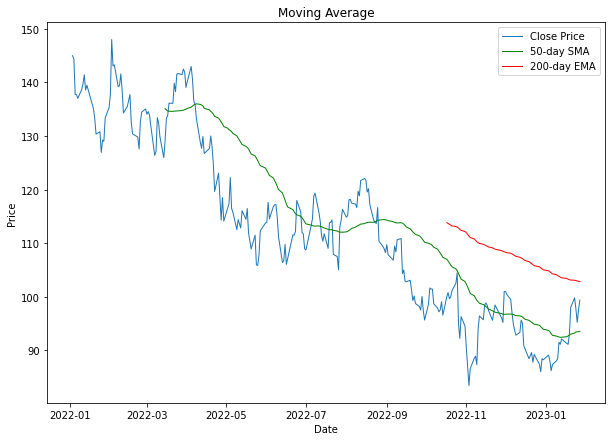

In [48]:
# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

In [49]:
SMA

Date
2022-03-15 00:00:00-04:00    135.11150
2022-03-16 00:00:00-04:00    134.87728
2022-03-17 00:00:00-04:00    134.66607
2022-03-18 00:00:00-04:00    134.63308
2022-03-21 00:00:00-04:00    134.60016
                               ...    
2023-01-23 00:00:00-05:00     93.22180
2023-01-24 00:00:00-05:00     93.42940
2023-01-25 00:00:00-05:00     93.45500
2023-01-26 00:00:00-05:00     93.47720
2023-01-27 00:00:00-05:00     93.55060
Name: SMA, Length: 220, dtype: float64

In [50]:
EWMA

Date
2022-10-17 00:00:00-04:00    113.832607
2022-10-18 00:00:00-04:00    113.682288
2022-10-19 00:00:00-04:00    113.520831
2022-10-20 00:00:00-04:00    113.365375
2022-10-21 00:00:00-04:00    113.225223
                                ...    
2023-01-23 00:00:00-05:00    103.077908
2023-01-24 00:00:00-05:00    103.020372
2023-01-25 00:00:00-05:00    102.936982
2023-01-26 00:00:00-05:00    102.879114
2023-01-27 00:00:00-05:00    102.841655
Name: EWMA_200, Length: 71, dtype: float64

In [51]:
EWMA

Date
2022-10-17 00:00:00-04:00    113.832607
2022-10-18 00:00:00-04:00    113.682288
2022-10-19 00:00:00-04:00    113.520831
2022-10-20 00:00:00-04:00    113.365375
2022-10-21 00:00:00-04:00    113.225223
                                ...    
2023-01-23 00:00:00-05:00    103.077908
2023-01-24 00:00:00-05:00    103.020372
2023-01-25 00:00:00-05:00    102.936982
2023-01-26 00:00:00-05:00    102.879114
2023-01-27 00:00:00-05:00    102.841655
Name: EWMA_200, Length: 71, dtype: float64